<a href="https://colab.research.google.com/github/roshank1605A04/Twitter-Sentiment-Analysis/blob/master/Twitter_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk

import warnings

In [43]:
train = pd.read_csv(r'D:\Twitter-Sentiment-Analysis-master\train_tweet.csv')
test = pd.read_csv(r'D:\Twitter-Sentiment-Analysis-master\test_tweets.csv')

print(train.shape)
print(test.shape)

(31962, 3)
(17197, 2)


In [44]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [45]:
test.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [46]:
train.isnull().any()
test.isnull().any()

id       False
tweet    False
dtype: bool

In [47]:
# checking out the negative comments from the train set

train[train['label'] == 0].head(10)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [48]:
# checking out the postive comments from the train set 

train[train['label'] == 1].head(10)

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
56,57,1,@user lets fight against #love #peace
68,69,1,ð©the white establishment can't have blk fol...
77,78,1,"@user hey, white people: you can call people '..."
82,83,1,how the #altright uses &amp; insecurity to lu...
111,112,1,@user i'm not interested in a #linguistics tha...


<Axes: xlabel='label'>

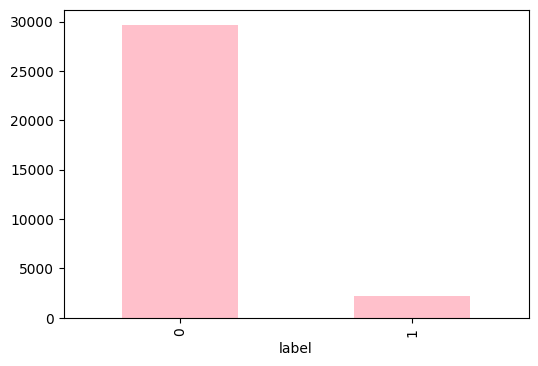

In [49]:
train['label'].value_counts().plot.bar(color = 'pink', figsize = (6, 4))

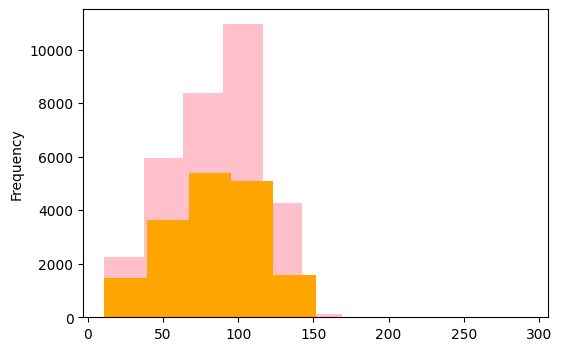

In [50]:
# checking the distribution of tweets in the data

length_train = train['tweet'].str.len().plot.hist(color = 'pink', figsize = (6, 4))
length_test = test['tweet'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [51]:
# adding a column to represent the length of the tweet

train['len'] = train['tweet'].str.len()
test['len'] = test['tweet'].str.len()

train.head(10)

,id,label,tweet,len
0,1,0,@user when a father is dysfunctional and is s...,102
1,2,0,@user @user thanks for #lyft credit i can't us...,122
2,3,0,bihday your majesty,21
3,4,0,#model i love u take with u all the time in ...,86
4,5,0,factsguide: society now #motivation,39
5,6,0,[2/2] huge fan fare and big talking before the...,116
6,7,0,@user camping tomorrow @user @user @user @use...,74
7,8,0,the next school year is the year for exams.ð...,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,50


In [52]:

train.groupby('label').describe()

id                                                               \
         count          mean          std   min      25%      50%       75%   
label                                                                         
0      29720.0  15974.454441  9223.783469   1.0  7981.75  15971.5  23965.25   
1       2242.0  16074.896075  9267.955758  14.0  8075.25  16095.0  24022.00   

                    len                                                        
           max    count       mean        std   min   25%   50%    75%    max  
label                                                                          
0      31962.0  29720.0  84.328634  29.566484  11.0  62.0  88.0  107.0  274.0  
1      31961.0   2242.0  90.187779  27.375502  12.0  69.0  96.0  111.0  152.0

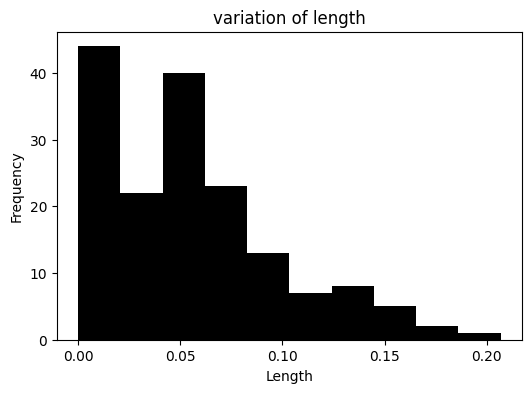

In [53]:
train.groupby('len')['label'].mean().plot.hist(color = 'black', figsize = (6, 4))
plt.title('variation of length')
plt.xlabel('Length')
plt.show()

Text(0.5, 1.0, 'Most Frequently Occuring Words - Top 30')

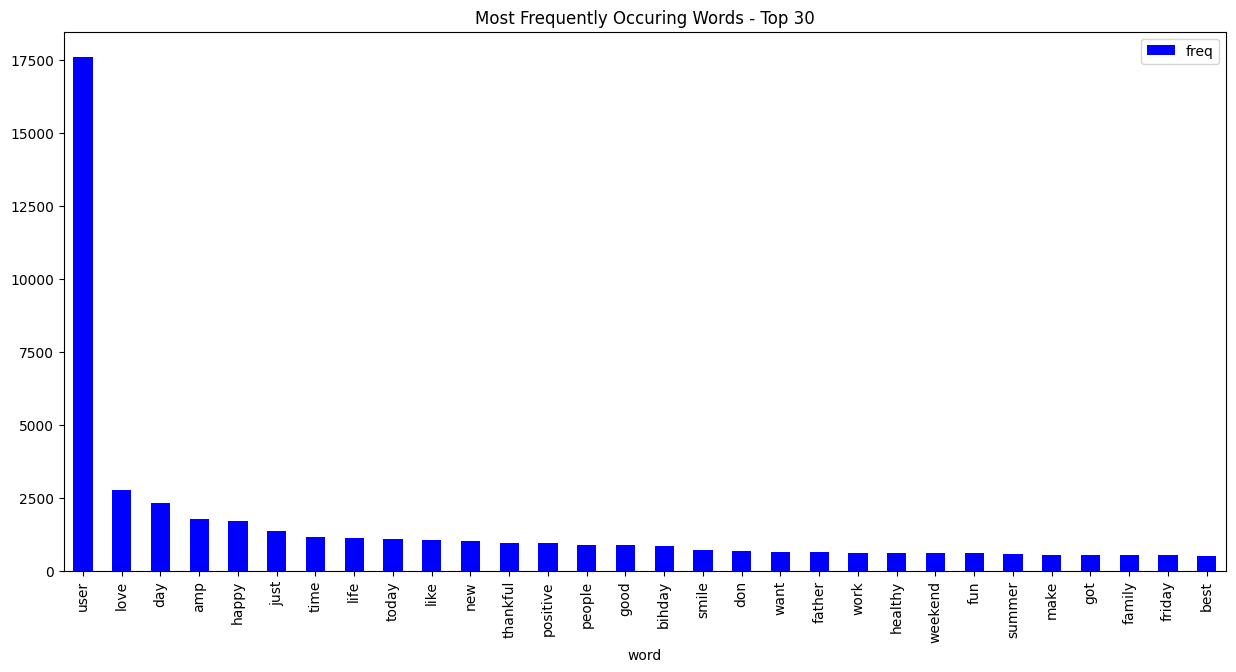

In [54]:
from sklearn.feature_extraction.text import CountVectorizer


cv = CountVectorizer(stop_words = 'english')
words = cv.fit_transform(train.tweet)

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words - Top 30")


Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

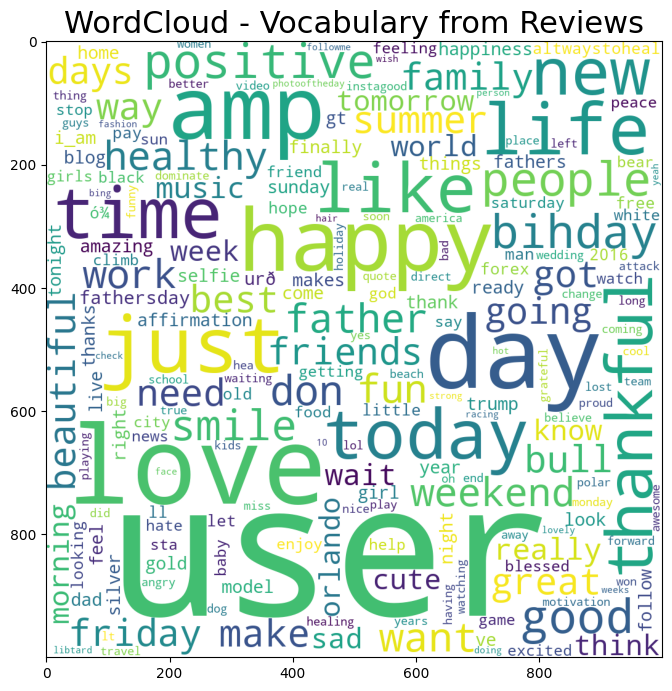

In [55]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

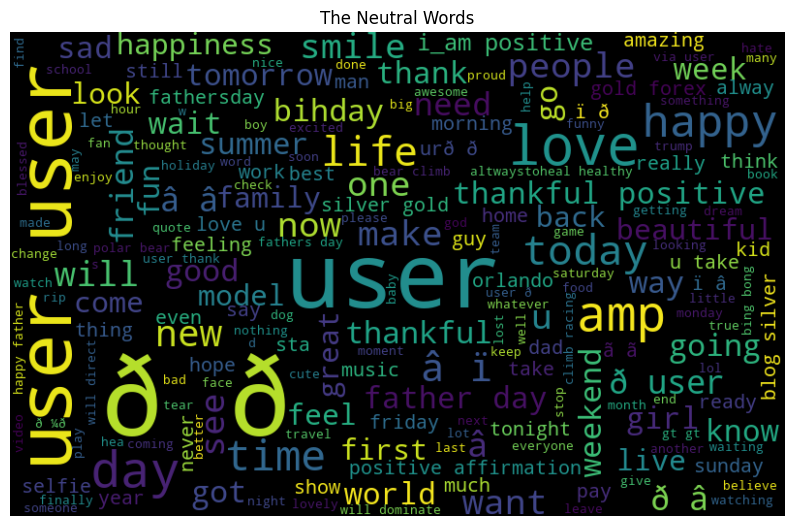

In [56]:
normal_words =' '.join([text for text in train['tweet'][train['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()


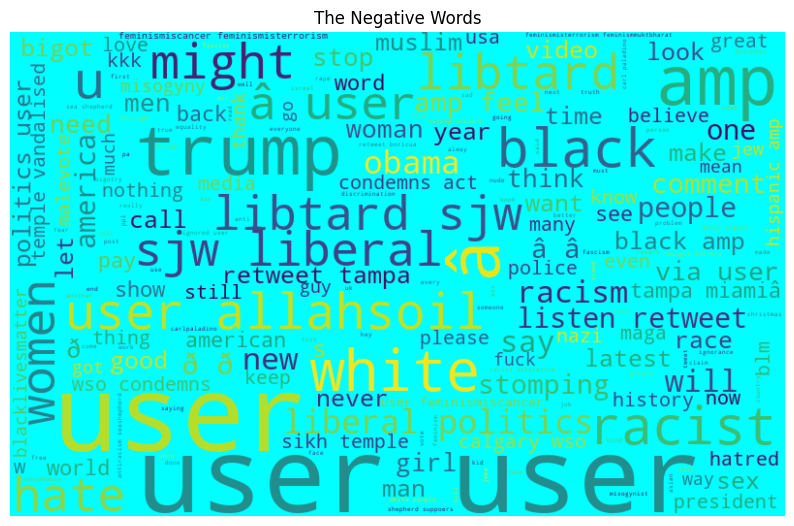

In [57]:
negative_words =' '.join([text for text in train['tweet'][train['label'] == 1]])

wordcloud = WordCloud(background_color = 'cyan', width=800, height=500, random_state = 0, max_font_size = 110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Negative Words')
plt.show()


In [58]:
# collecting the hashtags

def hashtag_extract(x):
    hashtags = []
    
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [59]:
# extracting hashtags from non racist/sexist tweets
HT_regular = hashtag_extract(train['tweet'][train['label'] == 0])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train['tweet'][train['label'] == 1])

# unnesting list
HT_regular = sum(HT_regular,[])
HT_negative = sum(HT_negative,[])

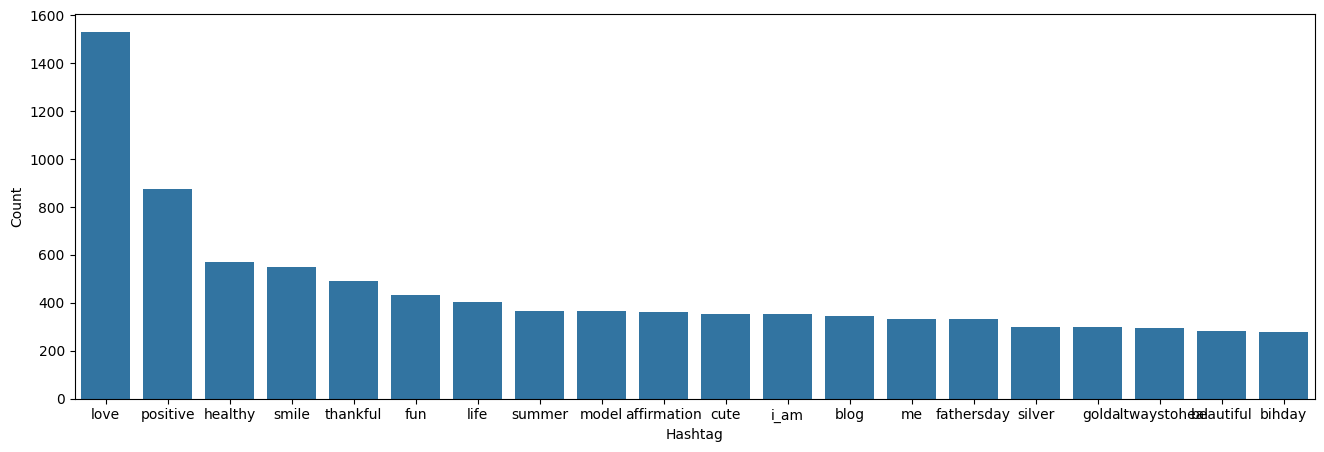

In [60]:
a = nltk.FreqDist(HT_regular)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

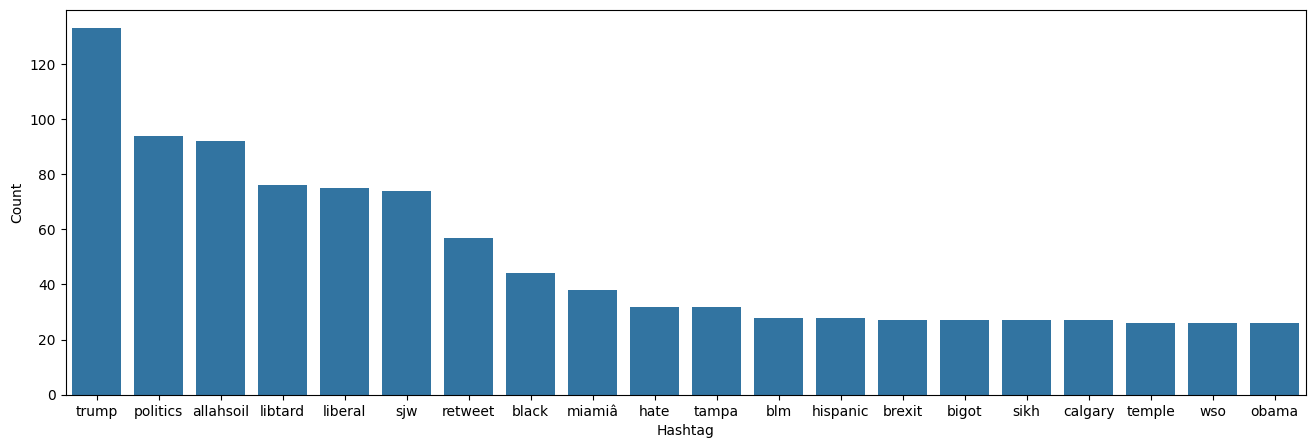

In [61]:
a = nltk.FreqDist(HT_negative)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 20 most frequent hashtags     
d = d.nlargest(columns="Count", n = 20) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

In [62]:
# tokenizing the words present in the training set
tokenized_tweet = train['tweet'].apply(lambda x: x.split()) 

# importing gensim
import gensim

# creating a word to vector model
model_w2v = gensim.models.Word2Vec(
            tokenized_tweet,
            vector_size=200, # desired no. of features/independent variables 
            window=5, # context window size
            min_count=2,
            sg = 1, # 1 for skip-gram model
            hs = 0,
            negative = 10, # for negative sampling
            workers= 2, # no.of cores
            seed = 34)

model_w2v.train(tokenized_tweet, total_examples= len(train['tweet']), epochs=20)

(6109793, 8411580)

In [63]:
model_w2v.wv.most_similar(positive = "dinner")

[('spaghetti', 0.674531877040863),
 ('#prosecco', 0.6116940379142761),
 ('#wanderlust', 0.5946490168571472),
 ('enroute', 0.590119481086731),
 ('fluffy', 0.5874036550521851),
 ('sister!!', 0.5869811773300171),
 ('#marbs', 0.5852428078651428),
 ('7!', 0.579633891582489),
 ('crackers', 0.5786824226379395),
 ('ð\x9f\x91\x8dð\x9f\x8f»ð\x9f\x91\x8dð\x9f\x8f»ð\x9f\x91\x8dð\x9f\x8f»â\x9d¤ï¸\x8fâ\x9d¤ï¸\x8f',
  0.5781363248825073)]

In [64]:
model_w2v.wv.most_similar(positive = "cancer")

[('champion,', 0.7162903547286987),
 ('ownership', 0.7005082964897156),
 ('level.', 0.700088620185852),
 ('intelligent', 0.6879944205284119),
 ('law.', 0.68523770570755),
 ('ways.', 0.6846874952316284),
 ('tolerance', 0.6836360692977905),
 ("society's", 0.6834043860435486),
 ('spots.', 0.6813128590583801),
 ('speeches', 0.6812211871147156)]

In [65]:
model_w2v.wv.most_similar(positive = "apple")

[('mytraining', 0.703793466091156),
 ('"mytraining"', 0.7016432285308838),
 ('training"', 0.6804938316345215),
 ('app,', 0.622096598148346),
 ('"my', 0.5938104391098022),
 ('ta', 0.5750073194503784),
 ('humans.', 0.5685126185417175),
 ('heroku', 0.5680555701255798),
 ('app', 0.5572591423988342),
 ('bees', 0.5524274110794067)]

In [66]:
model_w2v.wv.most_similar(negative = "hate")

[('â\x9c\x88ï¸\x8f', 0.026475589722394943),
 ('de', 0.019030006602406502),
 ('#tgif', 0.008342200890183449),
 ('#ireland', 0.004932038951665163),
 ('#staup', 0.002857886254787445),
 ('â\x99¡', 0.00243867514654994),
 ('#community', 0.0022594814654439688),
 ('ð\x9f\x8d»', 4.864378206548281e-05),
 ('#inlove', -5.6215740187326446e-05),
 ('hotel', -0.001094674225896597)]

In [67]:
from tqdm import tqdm
tqdm.pandas(desc="progress-bar")
from gensim.models.doc2vec import TaggedDocument

In [68]:
def add_label(twt):
    output = []
    for i, s in zip(twt.index, twt):
        output.append(TaggedDocument(s, ["tweet_" + str(i)]))
    return output

# label all the tweets
labeled_tweets = add_label(tokenized_tweet)

labeled_tweets[:6]

[TaggedDocument(words=['@user', 'when', 'a', 'father', 'is', 'dysfunctional', 'and', 'is', 'so', 'selfish', 'he', 'drags', 'his', 'kids', 'into', 'his', 'dysfunction.', '#run'], tags=['tweet_0']),
 TaggedDocument(words=['@user', '@user', 'thanks', 'for', '#lyft', 'credit', 'i', "can't", 'use', 'cause', 'they', "don't", 'offer', 'wheelchair', 'vans', 'in', 'pdx.', '#disapointed', '#getthanked'], tags=['tweet_1']),
 TaggedDocument(words=['bihday', 'your', 'majesty'], tags=['tweet_2']),
 TaggedDocument(words=['#model', 'i', 'love', 'u', 'take', 'with', 'u', 'all', 'the', 'time', 'in', 'urð\x9f\x93±!!!', 'ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91', 'ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦'], tags=['tweet_3']),
 TaggedDocument(words=['factsguide:', 'society', 'now', '#motivation'], tags=['tweet_4']),
 TaggedDocument(words=['[2/2]', 'huge', 'fan', 'fare', 'and', 'big', 'talking', 'before', 'they', 'leave.', 'chaos', 'and', 'pay', 'disputes', 'when', 'they', 'get', 'there.', '#allshowandnogo'],

In [69]:
# removing unwanted patterns from the data

nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [70]:
train_corpus = []

for i in range(0, len(train)):
  review = re.sub('[^a-zA-Z]', ' ', train['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  all_stopwords = stopwords.words('english')
  whitelist = ["n't", "not", "no", "nor"]
  final_stopwords = [word for word in all_stopwords if word not in whitelist]
  review = [ps.stem(word) for word in review if not word in set(final_stopwords)]
  
  # joining them back with space
  review = ' '.join(review)
  train_corpus.append(review)

In [71]:
test_corpus = []

for i in range(0, len(test)):
  review = re.sub('[^a-zA-Z]', ' ', test['tweet'][i])
  review = review.lower()
  review = review.split()
  
  ps = PorterStemmer()
  
  # stemming
  all_stopwords = stopwords.words('english')
  whitelist = ["n't", "not", "no", "nor"]
  final_stopwords = [word for word in all_stopwords if word not in whitelist]
  review = [ps.stem(word) for word in review if not word in set(final_stopwords)]
  
  # joining them back with space
  review = ' '.join(review)
  test_corpus.append(review)

In [72]:
# creating bag of words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features = 2500)
x = cv.fit_transform(train_corpus).toarray()
y = train.iloc[:, 1]

print(x.shape)
print(y.shape)


(31962, 2500)
(31962,)


In [73]:
# creating bag of words
x_test = cv.transform(test_corpus).toarray()

print(x_test.shape)


(17197, 2500)


In [74]:
# splitting the training data into train and valid sets

from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x, y, test_size = 0.25, random_state = 42)

print(x_train.shape)
print(x_valid.shape)
print(y_train.shape)
print(y_valid.shape)

(23971, 2500)
(7991, 2500)
(23971,)
(7991,)


In [75]:
# standardization

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_valid = sc.transform(x_valid)
x_test = sc.transform(x_test)


In [76]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score (Accuracy/F1)")

    # Hàm learning_curve sẽ train model nhiều lần với kích thước dữ liệu tăng dần
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring='f1') # Có thể đổi 'f1' thành 'accuracy'

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()

    # Vẽ vùng bao quanh (độ lệch chuẩn)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # Vẽ đường trung bình
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    # plt.show()

Training Accuracy : 0.849317925827041
Validation Accuracy : 0.8420723313727944
F1 score : 0.4091760299625468
[[6292 1140]
 [ 122  437]]


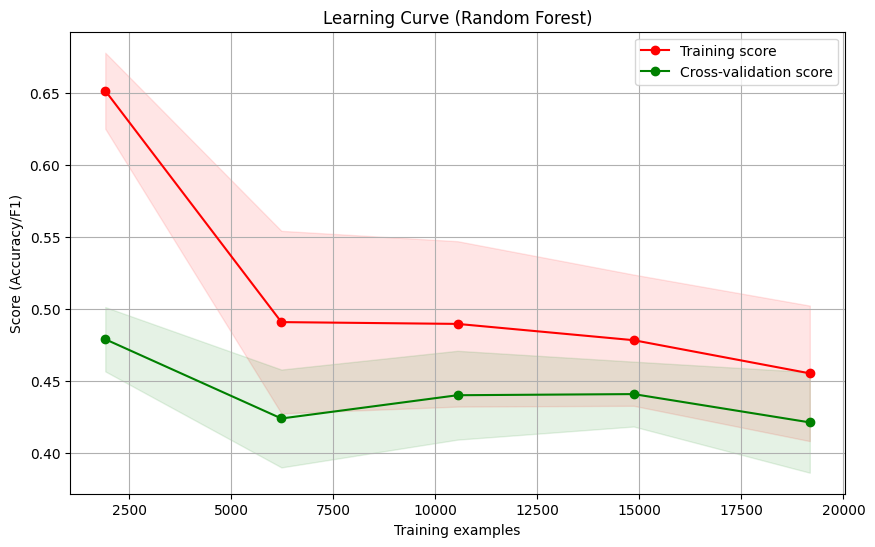

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

model = RandomForestClassifier(
    n_estimators=200,       
    max_depth=15,           
    min_samples_split=10,   
    min_samples_leaf=2,
    class_weight='balanced_subsample', 
    random_state=42,
    n_jobs=-1
)
model.fit(x_train, y_train)
plot_learning_curve(model, "Learning Curve (Random Forest)", x_train, y_train, cv=5, n_jobs=-1)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("F1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)



Training Accuracy : 0.9756789453923491
Validation Accuracy : 0.9541984732824428
f1 score : 0.6280487804878049
[[7316  116]
 [ 250  309]]


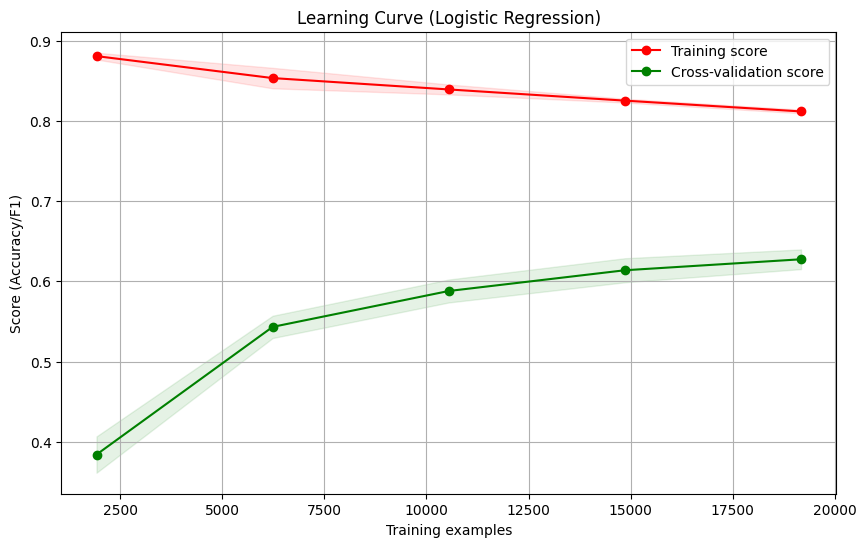

In [78]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', random_state=42)
model.fit(x_train, y_train)
plot_learning_curve(model, "Learning Curve (Logistic Regression)", x_train, y_train, cv=5, n_jobs=-1)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9457678027616704
Validation Accuracy : 0.9425603804279815
f1 score : 0.41379310344827586
[[7370   62]
 [ 397  162]]


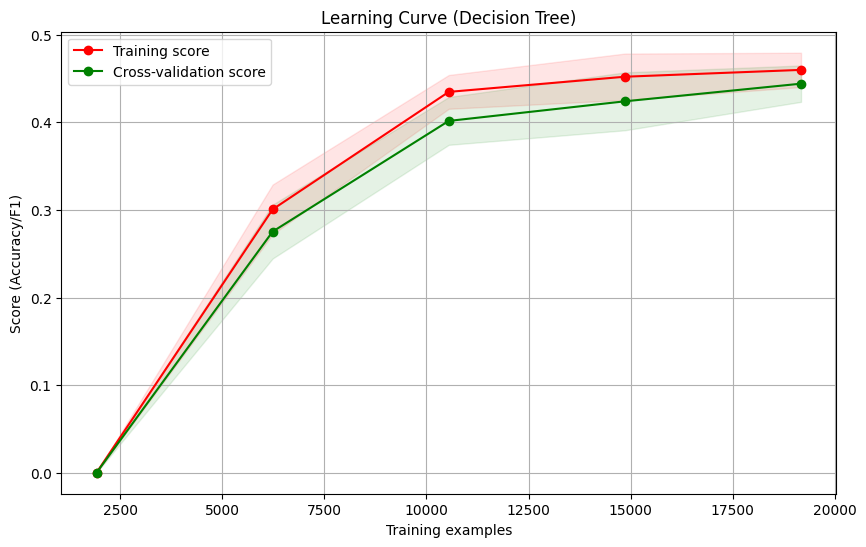

In [79]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    max_depth=20,          
    min_samples_split=40,   
    min_samples_leaf=20,   
    random_state=42
)
model.fit(x_train, y_train)
plot_learning_curve(model, "Learning Curve (Decision Tree)", x_train, y_train, cv=5, n_jobs=-1)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


Training Accuracy : 0.9808518626673898
Validation Accuracy : 0.918908772368915
f1 score : 0.5378031383737518
[[6966  466]
 [ 182  377]]


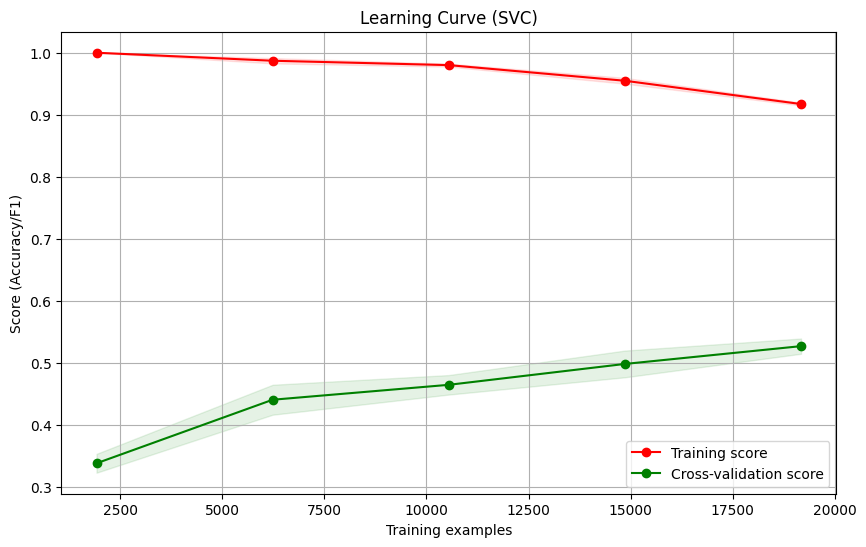

In [80]:
from sklearn.svm import SVC

model = SVC(
    C=0.1,                   
    kernel='linear',         
    class_weight={0: 1, 1: 5}, 
    probability=True,        
    random_state=42
)
model.fit(x_train, y_train)
plot_learning_curve(model, "Learning Curve (SVC)", x_train, y_train, cv=5, n_jobs=-1)

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:33:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Accuracy : 0.9565725251345376
Validation Accuracy : 0.9491928419471906
f1 score : 0.5915492957746479
[[7291  141]
 [ 265  294]]


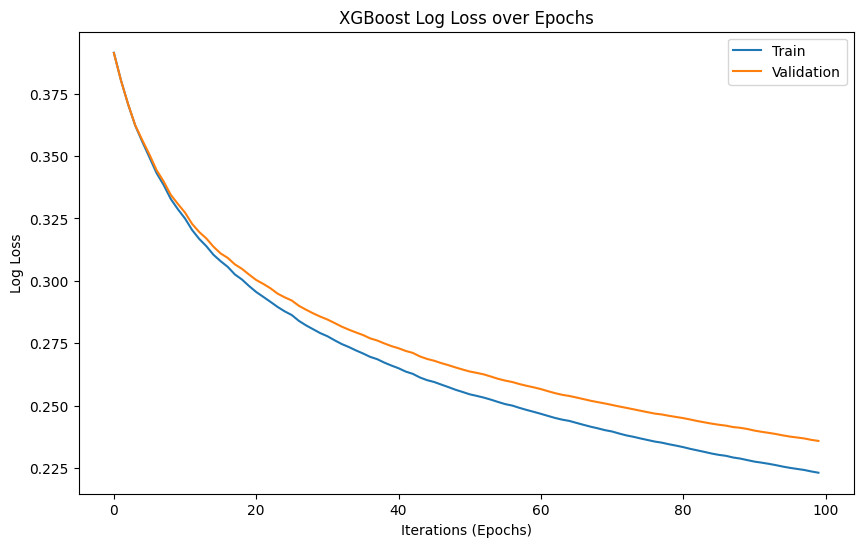

In [81]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100, learning_rate=0.1,scale_pos_weight=5, use_label_encoder=False, eval_metric='logloss')
eval_set = [(x_train, y_train), (x_valid, y_valid)]
model.fit(x_train, y_train, eval_set=eval_set, verbose=False)

results = model.evals_result()
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)

# 5. Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(x_axis, results['validation_0']['logloss'], label='Train')
ax.plot(x_axis, results['validation_1']['logloss'], label='Validation')
ax.legend()
plt.ylabel('Log Loss')
plt.xlabel('Iterations (Epochs)')
plt.title('XGBoost Log Loss over Epochs')
# plt.show()

y_pred = model.predict(x_valid)

print("Training Accuracy :", model.score(x_train, y_train))
print("Validation Accuracy :", model.score(x_valid, y_valid))

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_valid, y_pred))

# confusion matrix
cm = confusion_matrix(y_valid, y_pred)
print(cm)

In [82]:
import joblib

# 1. Lưu các bộ xử lý dữ liệu (Dùng chung cho tất cả model)
print("Đang lưu Vectorizer và Scaler...")
joblib.dump(cv, 'vectorizer.pkl')
joblib.dump(sc, 'scaler.pkl')

# 2. Định nghĩa danh sách các model cần lưu
print("Đang train và lưu từng model (Vui lòng đợi)...")

models_to_save = {
    "RandomForest": RandomForestClassifier(
    n_estimators=200,       
    max_depth=15,           
    min_samples_split=10,   
    min_samples_leaf=2,
    class_weight='balanced_subsample', 
    random_state=42,
    n_jobs=-1),
    "LogisticRegression": LogisticRegression(penalty='l1', C=0.1, solver='liblinear', random_state=42),
    "DecisionTree": DecisionTreeClassifier(
    max_depth=20,          
    min_samples_split=40,   
    min_samples_leaf=20,   
    random_state=42),
    "SVM": SVC(
    C=0.1,                   
    kernel='linear',         
    class_weight={0: 1, 1: 5}, 
    probability=True,        
    random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.1,scale_pos_weight=5, use_label_encoder=False, eval_metric='logloss')
}

# 3. Vòng lặp: Train lại và Lưu từng cái
for name, model in models_to_save.items():
    print(f"--> Đang xử lý: {name}...")
    model.fit(x_train, y_train) # Train lại để đảm bảo model mới nhất
    filename = f'model_{name}.pkl' # Ví dụ: model_SVM.pkl
    joblib.dump(model, filename)
    print(f"    Đã lưu: {filename}")

print("\nHOÀN TẤT! Đã lưu xong 5 model và 2 file xử lý.")

Đang lưu Vectorizer và Scaler...
Đang train và lưu từng model (Vui lòng đợi)...
--> Đang xử lý: RandomForest...
    Đã lưu: model_RandomForest.pkl
--> Đang xử lý: LogisticRegression...
    Đã lưu: model_LogisticRegression.pkl
--> Đang xử lý: DecisionTree...
    Đã lưu: model_DecisionTree.pkl
--> Đang xử lý: SVM...
    Đã lưu: model_SVM.pkl
--> Đang xử lý: XGBoost...


c:\Users\ADMIN\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:199: UserWarning: [18:48:06] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


    Đã lưu: model_XGBoost.pkl

HOÀN TẤT! Đã lưu xong 5 model và 2 file xử lý.
